# **1. Perkenalan Dataset**


Dataset: Pima Indians Diabetes Database
Sumber: Kaggle/UCI ML Repository
Deskripsi: Dataset ini berisi data medis untuk memprediksi diabetes
Jumlah Fitur: 8 fitur input, 1 target (Outcome)
Target: 
   - 0 = Tidak Diabetes
   - 1 = Diabetes

Fitur-fitur:
1. Pregnancies: jumlah kehamilan
2. Glucose: Konsentrasi glukosa plasma
3. BloodPressure: Tekanan Darah Diastolik (mm Hg)
4. SkinThickenss: Ketebalan kulit trisep (mm)
5. Insulin: Insulin serum 2 jam (mu U/ml)
6. BMI: Body Mass Index
7. DiabetesPedigreeFunction: Fungsi Silsilah diabetes
8. Age: Umur (Tahun)
9. Outcome: Variabel target (0 dan 1)



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../diabetes_raw.csv')

print('=' * 60)
print("INFORMASI DATASET")
print('=' * 60)
print(f"Jumlah baris dan kolom: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nPreview 5 data pertama")
print(df.head())

print("Dataset Berhasil Dimuat")

INFORMASI DATASET
Jumlah baris dan kolom: 768
Jumlah kolom: 9

Preview 5 data pertama
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset Berhasil Dimuat


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

EXPLORATORY DATA ANALYSIS (EDA)

--- Informasi Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

--- Statistik Deskriptif ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.00

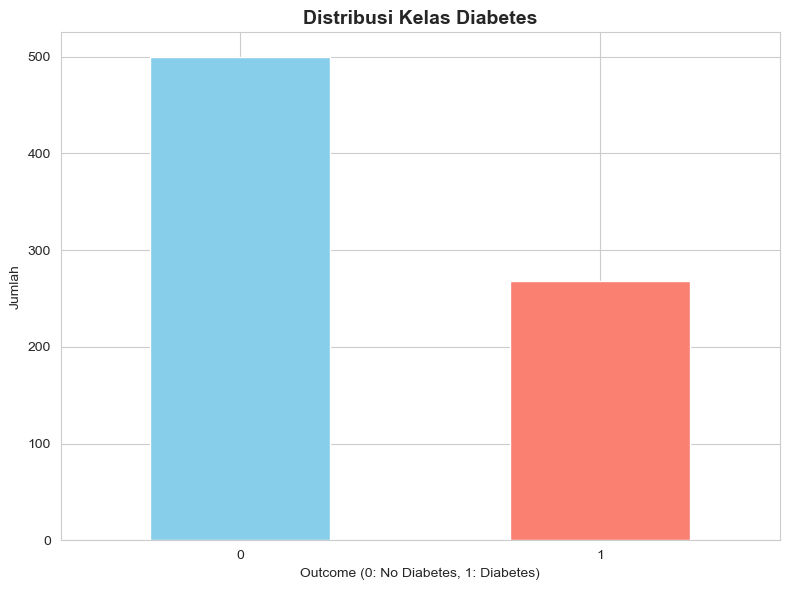


--- Deteksi Nilai 0 Yang Tidak Wajar ---
Glucose: 5 nilai nol (0.65%)
BloodPressure: 35 nilai nol (4.56%)
SkinThickness: 227 nilai nol (29.56%)
Insulin: 374 nilai nol (48.70%)
BMI: 11 nilai nol (1.43%)


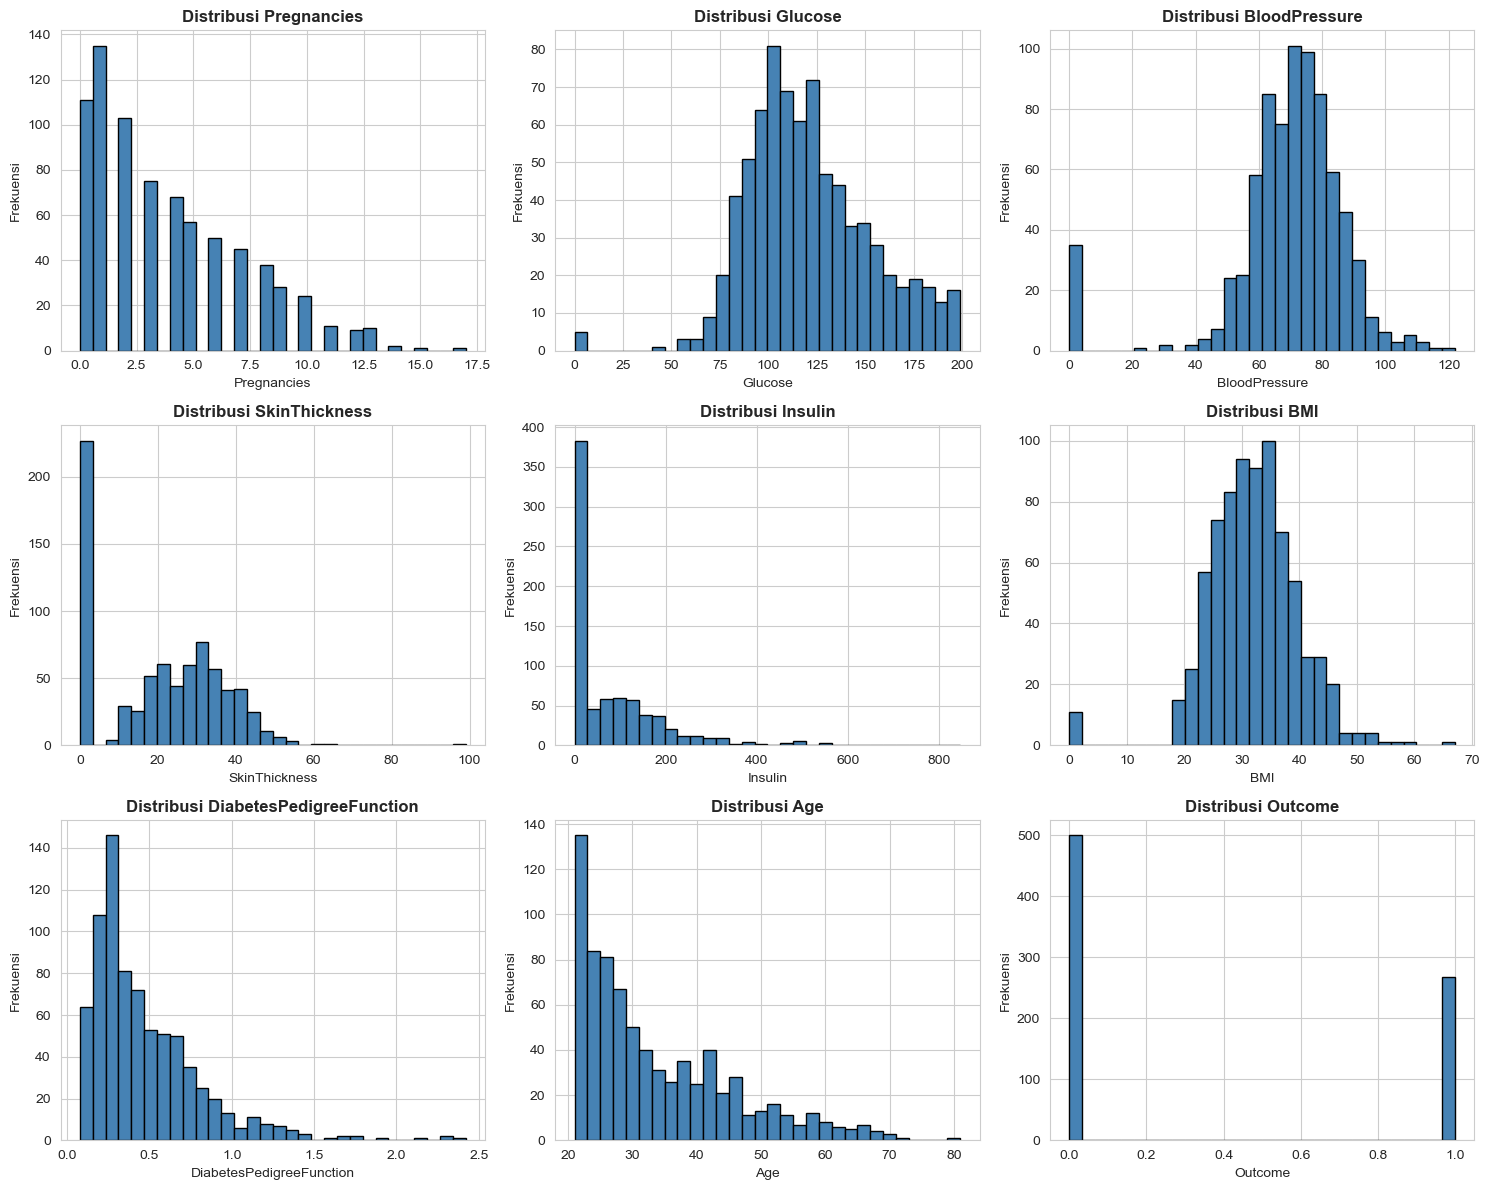


--- Korelasi Dengan Target ---
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


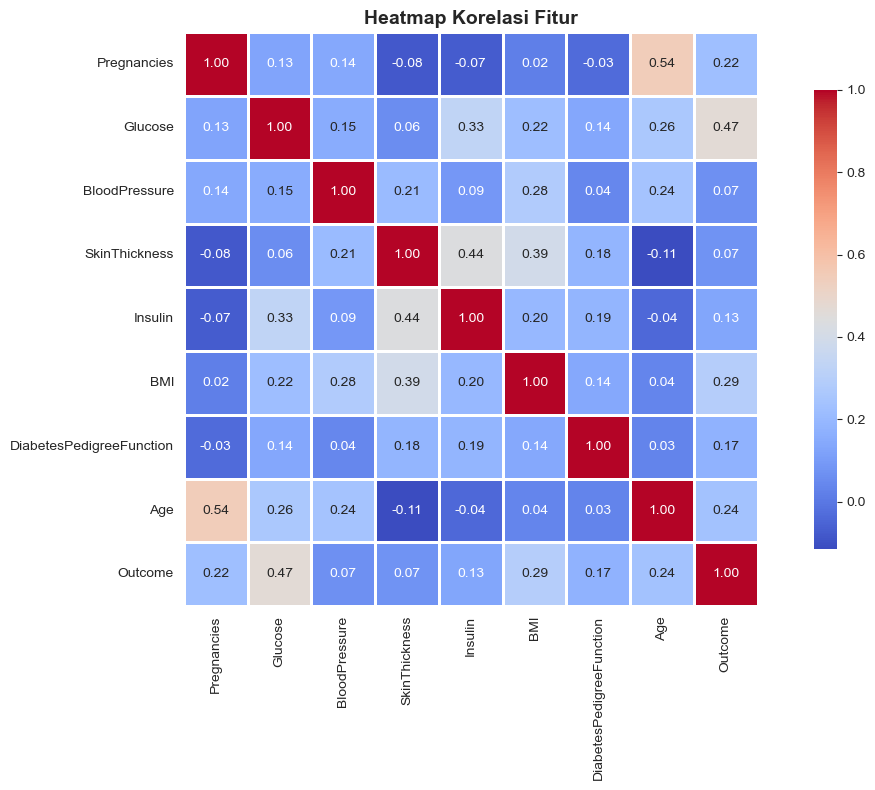

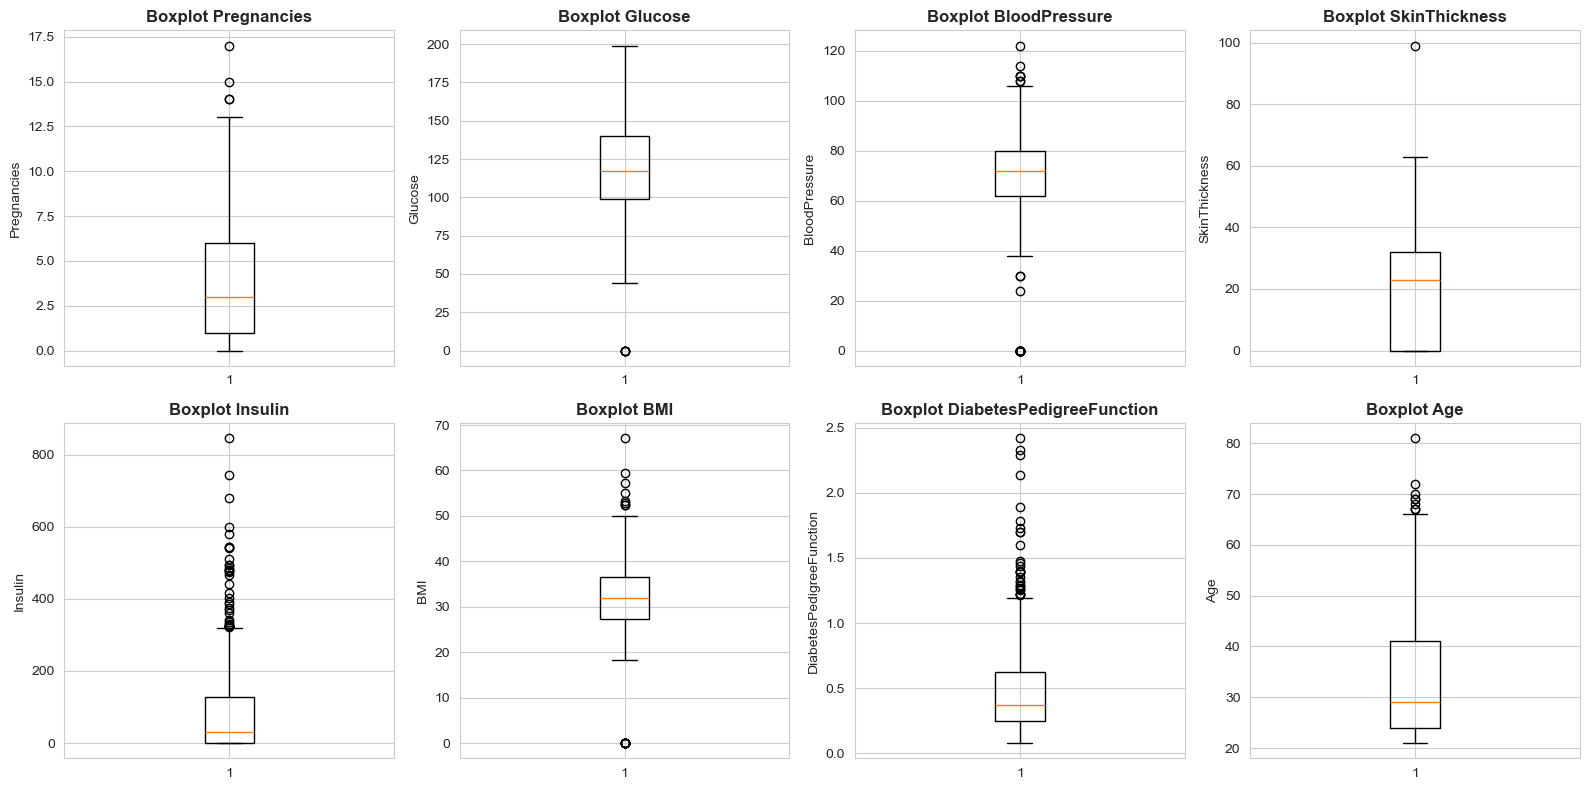


 Sesi EDA selesai!


In [6]:
print('=' * 60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print('=' * 60)

print("\n--- Informasi Tipe Data ---")
print(df.info())

print("\n--- Statistik Deskriptif ---")
print(df.describe())

print("\n--- Pengecheckan Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)
print("\n--- Total Missing Values: {missing_values.sum()}")

duplicate_count = df.duplicated().sum()
print(f"\n--- Total Duplicate Rows: {duplicate_count}")

print("\n--- Distribusi Target (Outcome) ---")
print(df['Outcome'].value_counts())
print("\nPersentase:")
print(df['Outcome'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8,6))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Beberapa fitur tidak boleh bernilai 0 secara medis
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n--- Deteksi Nilai 0 Yang Tidak Wajar ---")
for col in zero_features:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} nilai nol ({zero_pct:.2f}%)")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', color='steelblue')
    axes[idx].set_title(f'Distribusi {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print("\n--- Korelasi Dengan Target ---")
correlation = df.corr()['Outcome'].sort_values(ascending=False)
print(correlation)

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4.8 Boxplot untuk Deteksi Outlier
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(df.columns[:-1]):  # Exclude Outcome
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Boxplot {col}', fontweight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

print("\n Sesi EDA selesai!")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# 5.1 Handling Missing Values (Nilai 0 yang tidak wajar)
print("\n--- Step 1: Handling Nilai 0 Yang Tidak Wajar ---")

# Replace 0 dengan median untuk fitur yang tidak boleh 0
for col in zero_features:
    if col in df_processed.columns:
        # Hitung median dari nilai yang bukan 0
        median_value = df_processed[df_processed[col] != 0][col].median()
        # Replace 0 dengan median
        zeros_before = (df_processed[col] == 0).sum()
        df_processed[col] = df_processed[col].replace(0, median_value)
        zeros_after = (df_processed[col] == 0).sum()
        print(f"{col}: {zeros_before} → {zeros_after} nilai nol")

# 5.2 Handling Duplikat
print("\n--- Step 2: Handling Data Duplikat ---")
duplicates_before = df_processed.duplicated().sum()
df_processed = df_processed.drop_duplicates()
duplicates_after = df_processed.duplicated().sum()
print(f"Data duplikat: {duplicates_before} → {duplicates_after}")
print(f"Jumlah data setelah remove duplikat: {len(df_processed)}")

# 5.3 Handling Outliers (menggunakan IQR method)
print("\n--- Step 3: Handling Outliers ---")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    before_count = len(df)
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after_count = len(df_clean)
    removed = before_count - after_count
    
    return df_clean, removed

# Remove outliers untuk fitur numerik
outlier_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

len_before = len(df_processed)
for col in outlier_features:
    if col in df_processed.columns:
        df_processed, removed = remove_outliers_iqr(df_processed, col)
        print(f"{col}: {removed} outliers dihapus")

len_after = len(df_processed)
print(f"\nTotal data: {len_before} → {len_after}")

# 5.4 Feature Engineering (Optional - bisa ditambahkan jika perlu)
print("\n--- Step 4: Feature Engineering ---")
# Contoh: Membuat kategori BMI
df_processed['BMI_Category'] = pd.cut(df_processed['BMI'], 
                                       bins=[0, 18.5, 25, 30, 100],
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
print("Fitur BMI_Category berhasil dibuat")
print(df_processed['BMI_Category'].value_counts())

# Encoding BMI_Category
df_processed = pd.get_dummies(df_processed, columns=['BMI_Category'], prefix='BMI')

# 5.5 Split Data (X dan y)
print("\n--- Step 5: Split Features dan Target ---")
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"Shape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")

# 5.6 Normalisasi/Standarisasi
print("\n--- Step 6: Standarisasi Fitur ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Standarisasi selesai!")
print("\nSample data setelah standarisasi:")
print(X_scaled_df.head())

# 5.7 Split Train-Test
print("\n--- Step 7: Split Train-Test ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 5.8 Simpan Data Hasil Preprocessing
print("\n--- Step 8: Menyimpan Data Preprocessing ---")

# Gabungkan X dan y untuk disimpan
df_final = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
df_final.to_csv('diabetes_preprocessing.csv', index=False)

print("Data preprocessing berhasil disimpan!")
print(f"File: diabetes_preprocessing.csv")
print(f"Shape: {df_final.shape}")

# ============================================================
# SUMMARY
# ============================================================

print("\n" + "=" * 60)
print("SUMMARY PREPROCESSING")
print("=" * 60)
print(f"Dataset awal: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Dataset akhir: {df_final.shape[0]} rows × {df_final.shape[1]} columns")
print(f"\nData berkurang: {df.shape[0] - df_final.shape[0]} rows")
print(f"Fitur bertambah: {df_final.shape[1] - df.shape[1]} columns (karena encoding)")
print("\nPREPROCESSING SELESAI! ")
print("=" * 60)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13760\1449529747.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [9]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Pima Indians Diabetes")

with mlflow.start_run(run_name="RandomForest_v1"):
    model = RandomForestClassifier(n_estimators=150, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Akurasi: {acc:.4f}")
    print(f"Presisi: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Log parameter dan metrik ke MLflow
    mlflow.log_param("n_estimators", 150)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    # Simpan model ke MLflow
    mlflow.sklearn.log_model(model, "model")


2025/11/04 09:29:30 INFO mlflow.tracking.fluent: Experiment with name 'Pima Indians Diabetes' does not exist. Creating a new experiment.


Akurasi: 0.7403
Presisi: 0.6522
Recall: 0.5556
F1 Score: 0.6000


2025/11/04 09:29:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_v1 at: http://127.0.0.1:5000/#/experiments/157244134664808205/runs/cdd2a956206149bdbb4d49fcaa1cb5e6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/157244134664808205


In [11]:
#Opsional 
import joblib
joblib.dump(model, "rf_pima_model.pkl")


['rf_pima_model.pkl']